In This notebook, we load and investigate the S11 Measurements on the Greenbank feed.

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import scipy.signal as signal

In [37]:
#First load in the data
dFile1='DATA00.d1'
dFile2='DATA02.d1'
d1=np.loadtxt(dFile1,skiprows=9,delimiter=',')[:-1,:]
d2=np.loadtxt(dFile2,skiprows=9,delimiter=',')[:-1,:]
freqAxis=100e6+np.arange(1600)*100e6/1600

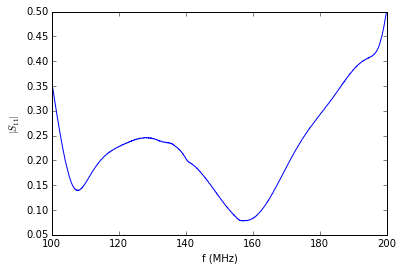

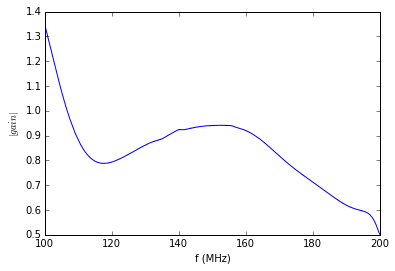

In [38]:
plt.plot(freqAxis/1e6,np.sqrt(np.abs(d2[:,0])**2.+np.abs(d2[:,1])**2.))
plt.xlabel('f (MHz)')
plt.ylabel('$|S_{11}|$')
plt.savefig('s11_abs.pdf')
plt.show()
plt.plot(freqAxis/1e6,np.sqrt(np.abs(1-d2[:,0])**2.+np.abs(-d2[:,1])**2.))
plt.xlabel('f (MHz)')
plt.ylabel('$|gain|$')
plt.savefig('gain_abs.pdf')


In [39]:
def fft1d(data):
    return fft.fftshift(fft.fft(fft.fftshift(data)))

def fft1d_pad(data):
    window=signal.blackmanharris(len(data))
    #window=np.hanning(len(data))
    window=window/np.sqrt(np.mean(window**2.))
    dw=data*window
    dw=np.pad(dw,((len(data),0)),mode='constant')
    return fft.fftshift(fft.ifft(dw))


In [43]:
def getDC(data):
    window=signal.blackmanharris(len(data))
    #window=np.hanning(len(data))
    window=window/np.sqrt(np.mean(window**2.))
    return fft.fftshift(fft.ifft(fft.fftshift(data*window)))[len(data)/2]

rFeed=getDC(d2[:,0]+1j*d2[:,1])
dComplex=d2[:,0]+1j*d2[:,1]
rData=(dComplex-rFeed)/(1./rFeed-1.)+(1-rFeed)
rData=(dComplex)/(1./rFeed-1.)
rFunction=fft1d_pad(rData)

In [44]:
delays=fft.fftshift(fft.fftfreq(2*d2.shape[0],100e6/1600.))

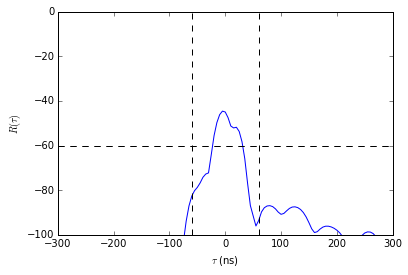

In [45]:
plt.plot(delays*1e9,2*10.*np.log10(rFunction))
#plt.plot(delays*1e9,2*10.*np.log10(np.abs(rFunctionRect)/np.abs(rFunctionRect).max()))

plt.xlabel('$\\tau$ (ns)')
plt.ylabel('$R(\\tau)$')
plt.xlim(-300,300)
plt.axhline(-60,color='k',ls='--')
plt.axvline(60,color='k',ls='--')


plt.axhline(-60,color='k',ls='--')
plt.axvline(-60,color='k',ls='--')
plt.ylim(-100,0)
#plt.gcf().set_size_inches(20,10)
plt.savefig('delayResponse_feedOnly.pdf')